# Preventing Overfitting in Deep Learning

In this activity, you will explore various techniques to prevent overfitting while training a neural network on the Fashion MNIST dataset.

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

## Step 1: Load and Preprocess the Data
We will load the Fashion MNIST dataset and normalize pixel values to the range [0, 1].

In [2]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_val = x_train[:50000] / 255.0, x_train[50000:] / 255.0
y_train, y_val = y_train[:50000], y_train[50000:]
x_test = x_test / 255.0

## Step 2: Build the Base Model
We start by creating a simple feedforward neural network as our base model.

Epoch 1/10
1563/1563 [==============================] - 1s 520us/step - loss: 0.5102 - accuracy: 0.8214 - val_loss: 0.4249 - val_accuracy: 0.8497
Epoch 2/10
1563/1563 [==============================] - 1s 483us/step - loss: 0.3868 - accuracy: 0.8616 - val_loss: 0.4100 - val_accuracy: 0.8499
Epoch 3/10
1563/1563 [==============================] - 1s 491us/step - loss: 0.3490 - accuracy: 0.8734 - val_loss: 0.3573 - val_accuracy: 0.8700
Epoch 4/10
1563/1563 [==============================] - 1s 488us/step - loss: 0.3234 - accuracy: 0.8818 - val_loss: 0.3578 - val_accuracy: 0.8722
Epoch 5/10
1563/1563 [==============================] - 1s 500us/step - loss: 0.3005 - accuracy: 0.8891 - val_loss: 0.3445 - val_accuracy: 0.8775
Epoch 6/10
1563/1563 [==============================] - 1s 496us/step - loss: 0.2854 - accuracy: 0.8939 - val_loss: 0.3333 - val_accuracy: 0.8787
Epoch 7/10
1563/1563 [==============================] - 1s 488us/step - loss: 0.2738 - accuracy: 0.8989 - val_loss: 0.3422 -

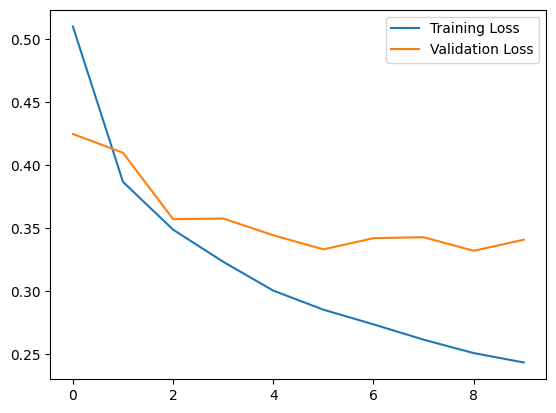

In [ ]:
# Function to build the base model
def build_base_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train the base model
base_model = build_base_model()
history = base_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation loss
def plot_curves(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.show()

plot_curves(history)

## Step 3: Add Regularization Techniques
Now, let's apply L1/L2 regularization, dropout, data augmentation, and early stopping to prevent overfitting. Each method will be tested separately, and results will be compared.

In [17]:
l1_model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.0001)),
        layers.Dense(10, activation='softmax')
    ])
    
l1_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

l1_regularized_model = l1_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 1s 559us/step - loss: 0.7788 - accuracy: 0.8155 - val_loss: 0.6573 - val_accuracy: 0.8310
Epoch 2/10
1563/1563 [==============================] - 1s 528us/step - loss: 0.5946 - accuracy: 0.8466 - val_loss: 0.6510 - val_accuracy: 0.8144
Epoch 3/10
1563/1563 [==============================] - 1s 528us/step - loss: 0.5423 - accuracy: 0.8567 - val_loss: 0.5823 - val_accuracy: 0.8391
Epoch 4/10
1563/1563 [==============================] - 1s 530us/step - loss: 0.5095 - accuracy: 0.8641 - val_loss: 0.5369 - val_accuracy: 0.8564
Epoch 5/10
1563/1563 [==============================] - 1s 532us/step - loss: 0.4921 - accuracy: 0.8660 - val_loss: 0.5382 - val_accuracy: 0.8465
Epoch 6/10
1563/1563 [==============================] - 1s 526us/step - loss: 0.4775 - accuracy: 0.8698 - val_loss: 0.5173 - val_accuracy: 0.8559
Epoch 7/10
1563/1563 [==============================] - 1s 526us/step - loss: 0.4671 - accuracy: 0.8726 - val_loss: 0.5066 -

In [5]:
l2_model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dense(10, activation='softmax')
    ])
    
l2_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

l2_regularized_model = l2_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 1s 550us/step - loss: 0.5330 - accuracy: 0.8205 - val_loss: 0.4631 - val_accuracy: 0.8444
Epoch 2/10
1563/1563 [==============================] - 1s 510us/step - loss: 0.4183 - accuracy: 0.8592 - val_loss: 0.4562 - val_accuracy: 0.8471
Epoch 3/10
1563/1563 [==============================] - 1s 508us/step - loss: 0.3854 - accuracy: 0.8724 - val_loss: 0.4204 - val_accuracy: 0.8640
Epoch 4/10
1563/1563 [==============================] - 1s 511us/step - loss: 0.3678 - accuracy: 0.8790 - val_loss: 0.4182 - val_accuracy: 0.8645
Epoch 5/10
1563/1563 [==============================] - 1s 510us/step - loss: 0.3538 - accuracy: 0.8848 - val_loss: 0.3936 - val_accuracy: 0.8746
Epoch 6/10
1563/1563 [==============================] - 1s 515us/step - loss: 0.3451 - accuracy: 0.8887 - val_loss: 0.3942 - val_accuracy: 0.8722
Epoch 7/10
1563/1563 [==============================] - 1s 520us/step - loss: 0.3366 - accuracy: 0.8917 - val_loss: 0.3934 -

In [11]:
from keras.layers import Dropout

dropout_model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        Dropout(0.25),
        layers.Dense(10, activation='softmax')
    ])
    
dropout_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

dropout_layer_model = dropout_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 1s 540us/step - loss: 0.5548 - accuracy: 0.8041 - val_loss: 0.4595 - val_accuracy: 0.8340
Epoch 2/10
1563/1563 [==============================] - 1s 507us/step - loss: 0.4142 - accuracy: 0.8491 - val_loss: 0.4230 - val_accuracy: 0.8402
Epoch 3/10
1563/1563 [==============================] - 1s 515us/step - loss: 0.3819 - accuracy: 0.8598 - val_loss: 0.4281 - val_accuracy: 0.8412
Epoch 4/10
1563/1563 [==============================] - 1s 506us/step - loss: 0.3622 - accuracy: 0.8670 - val_loss: 0.3718 - val_accuracy: 0.8635
Epoch 5/10
1563/1563 [==============================] - 1s 505us/step - loss: 0.3437 - accuracy: 0.8739 - val_loss: 0.3631 - val_accuracy: 0.8719
Epoch 6/10
1563/1563 [==============================] - 1s 509us/step - loss: 0.3345 - accuracy: 0.8760 - val_loss: 0.3543 - val_accuracy: 0.8779
Epoch 7/10
1563/1563 [==============================] - 1s 507us/step - loss: 0.3235 - accuracy: 0.8793 - val_loss: 0.3619 -

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

x_train_reshaped = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], 28, 28, 1)

train_generator = gen.flow(x_train_reshaped, y_train, batch_size=128)
test_generator = test_gen.flow(x_test_reshaped, y_test, batch_size=128)

data_aug_model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        Dropout(0.25),
        layers.Dense(10, activation='softmax')
    ])
    
data_aug_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

data_aug_model_fit = data_aug_model.fit(
    train_generator,                 # Training data generator
    steps_per_epoch=60000 // 128,    # Number of steps per epoch
    epochs=10,                       # Total number of epochs
    verbose=1,                       # Verbose output during training
    validation_data=test_generator,  # Validation data generator
    validation_steps=10000 // 128    # Number of steps for validation
)

Epoch 1/10
468/468 [==============================] - 3s 6ms/step - loss: 0.8935 - accuracy: 0.6738 - val_loss: 0.6091 - val_accuracy: 0.7712


In [15]:
early_stop_model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dense(10, activation='softmax')
    ])
    
early_stop_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop_model_fit = early_stop_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks = [EarlyStopping(monitor='val_accuracy', patience=0.016)])

Epoch 1/10
1563/1563 [==============================] - 1s 657us/step - loss: 0.5420 - accuracy: 0.8198 - val_loss: 0.4824 - val_accuracy: 0.8330
Epoch 2/10
1563/1563 [==============================] - 1s 524us/step - loss: 0.4184 - accuracy: 0.8598 - val_loss: 0.4290 - val_accuracy: 0.8569
Epoch 3/10
1563/1563 [==============================] - 1s 516us/step - loss: 0.3860 - accuracy: 0.8724 - val_loss: 0.4298 - val_accuracy: 0.8615
Epoch 4/10
1563/1563 [==============================] - 1s 516us/step - loss: 0.3684 - accuracy: 0.8779 - val_loss: 0.4710 - val_accuracy: 0.8355


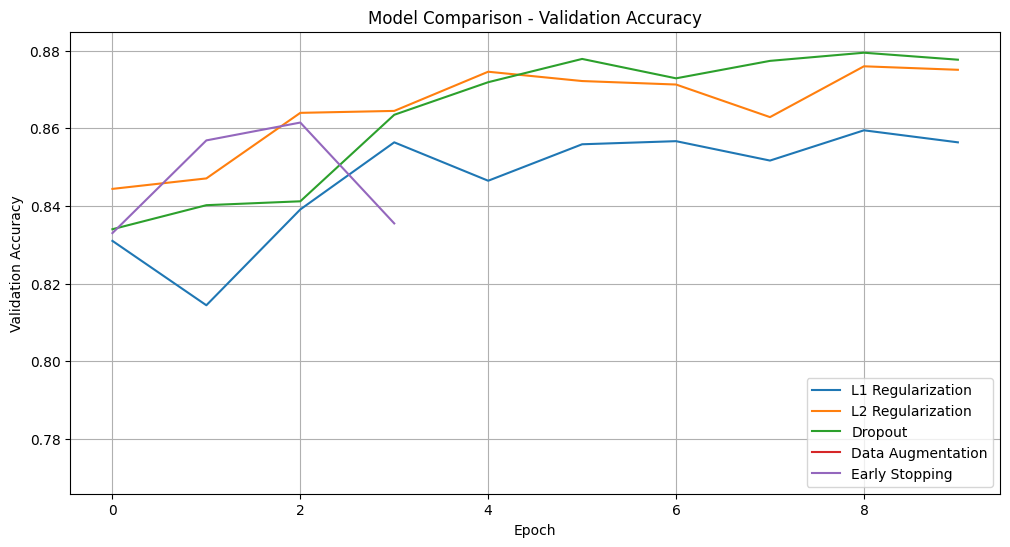

In [22]:
# Create a figure for comparison
plt.figure(figsize=(12, 6))

# Plot validation accuracy for each model
plt.plot(l1_regularized_model.history['val_accuracy'], label='L1 Regularization')
plt.plot(l2_regularized_model.history['val_accuracy'], label='L2 Regularization')
plt.plot(dropout_layer_model.history['val_accuracy'], label='Dropout')
plt.plot(data_aug_model_fit.history['val_accuracy'], label='Data Augmentation')
plt.plot(early_stop_model_fit.history['val_accuracy'], label='Early Stopping')

plt.title('Model Comparison - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In this example, the dropout method seems to perform best indicating that the training data was not very generalizable. The dropout method introduced enough noise to the model so that it was more able to process new data better than some of the other models.